In [ ]:
'''
    This file is used to discuss the importance of
    weight initialization.
    
    There are several ways of weight initialization.
    
    1. Pre-training
    2. Random Initialization
    3. Xavier Initialization
    4. He Initialization
    5. Batch Normalization Layer
'''

# Pre-training: Use the model which has been trained on task A
#               for task B with fine-tuning.

input mean 0.00092 and std 1.00075
layer 1: mean -0.00029 and std 0.26390
layer 2: mean -0.00007 and std 0.07204
layer 3: mean -0.00000 and std 0.01906
layer 4: mean 0.00001 and std 0.00485
layer 5: mean -0.00000 and std 0.00119
layer 6: mean 0.00000 and std 0.00028
layer 7: mean -0.00000 and std 0.00006
layer 8: mean -0.00000 and std 0.00001
layer 9: mean 0.00000 and std 0.00000


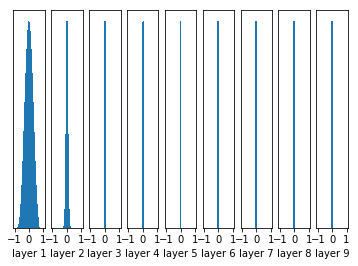

In [18]:
# Random Initialization
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

graph = tf.Graph()
with graph.as_default():
    data = tf.constant(np.random.randn(2000, 800).astype('float32'))
    layer_sizes = [800 - 50 * i for i in range(0,10)]
    num_layers = len(layer_sizes)
    
    fcs = [] # store the output of each layer
    for i in range(0, num_layers - 1):
        X = data if i == 0 else fcs[i - 1]
        node_input = layer_sizes[i]
        node_output = layer_sizes[i + 1]
        W = tf.Variable(np.random.randn(node_input, node_output).astype
                ('float32')) * 0.01 # Random Gaussian/Normal Distribution Initialization for weights
        fc = tf.matmul(X, W)
        fc = tf.nn.tanh(fc)
        fcs.append(fc)
        
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    print('input mean {0:.5f} and std {1:.5f}'.format(np.mean(data.eval()),
                                                      np.std(data.eval())))
    
    for idx, fc in enumerate(fcs):
        print('layer {0}: mean {1:.5f} and std {2:.5f}'.format(idx+1, np.mean(fc.eval()),
                                                              np.std(fc.eval())))
        
    plt.figure()
    for idx, fc in enumerate(fcs):
        plt.subplot(1, len(fcs), idx+1)
        plt.hist(fc.eval().flatten(), 30, range=[-1,1])
        plt.xlabel('layer ' + str(idx + 1))
        plt.yticks([])
        
    plt.show()